In [15]:
import numpy as np
import matplotlib.pyplot as plt


In [16]:
def HLabels(n, distorted = False):
    out = []
    if not distorted:
        for i in range(n):
            out = out + [(i + 1, "a")]
    else: 
        for i in range(n):
                out = out + [(i, "b")]
                out = out + [(i, "a")]
    return out

def HMomentumlabels(n, distorted = False):
    out = []
    if not distorted:
        for i in range(n):
            out = out + [(i, "a")]
    else:
        for i in range(n):
            out = out + [(i, "a")] + [(i, "b")]
    return out

def HLabelToR(label, distorted = False):
    if not distorted:
        return label[0] - 1
    else:
        offset = 0
        if (label[1] == "b"):
            offset = 0.8
        r = 2 *label[0] + offset
        return r

def HLabelToIndex(label, distorted = False):
    if not distorted:
        return label[0]
    else:
        return np.floor(label[0]/2) + (label[1] == "b")
        
def HMomentumLabelToK(label, n, distorted = False):
    if not distorted:
        b1 = 2 * np.pi / n
        return label[0] * b1
    else:
        b1 = 2 * np.pi / (n * 2)
        return label[0] * b1    



Text(0.5, 1.0, 'Nondistorted Hydrogen')

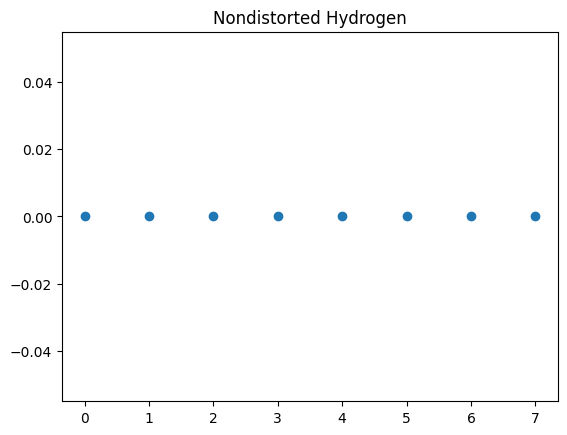

In [17]:
hlabels = HLabels(8)
hlocations = [HLabelToR(i) for i in hlabels]
plt.scatter(hlocations, np.zeros(len(hlabels)))
plt.title("Nondistorted Hydrogen")

Text(0.5, 1.0, 'Distorted Hydrogen')

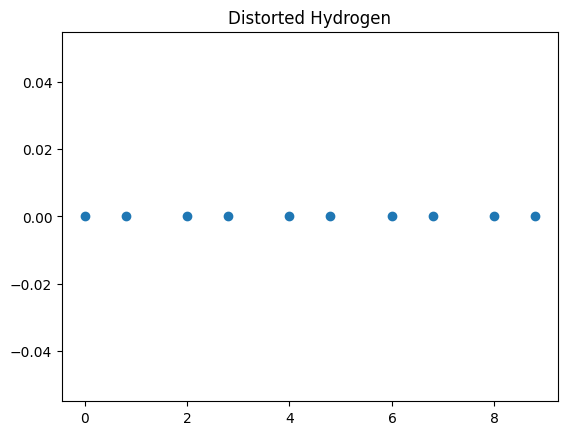

In [18]:
dhlabels = HLabels(5, distorted=True)
dhlocations = [HLabelToR(i, distorted=True) for i in dhlabels]
plt.scatter(dhlocations, np.zeros(len(dhlabels)))
plt.title("Distorted Hydrogen")

In [22]:
def HydrogenHamiltonian(n, distorted=False):
    hlabels = HLabels(n, distorted)
    out = np.zeros((n, n))
    if not distorted:
        for i in range(n):
            for j in range(n):
                if abs(hlabels[i][0] - hlabels[j][0]) in [1, n-1]:
                    out[i, j] = -1 
    else:
        out = np.zeros((2*n, 2*n))
        for i in range(n):
            for j in range(n):
                for k in ["a", "b"]:
                    for l in ["a", "b"]:
                        if (k != l):
                            # write to 2i + (k==b), 2j + (l==b)
                            x = 2*i + (k=="b")
                            y = 2*j + (l=="b")
                            if (abs(x - y) in [1, 2*n-1]):
                                out[x, y] = -0.1
                            if (i == j):
                                out[x, y] = -1
    
    return out

def HydrogenTransform(n, distorted=False):
    if not distorted:
        
        out = np.zeros((n, n), dtype=complex)
        for i in range(n):
            for j in range(n):
                out[i][j] = 1/np.sqrt(n) * np.exp(1.j * HMomentumLabelToK((j, "a"), n) * HLabelToR((i, "a")))
        return np.asmatrix(out)
    else:
        hlabels = HLabels(n, distorted=True)
        klabels = HMomentumlabels(n, distorted=True)
        out = np.zeros((2*n, 2*n), dtype=complex)
        r_vec = np.array([HLabelToR(hlabels[i], distorted=True) for i in np.arange(0, 2*n)])
        k_vec = np.array([HMomentumLabelToK(klabels[i], n, distorted=True) for i in np.arange(0, 2*n)])
        out = np.outer(r_vec, k_vec)
        deltas = np.indices((2*n, 2*n)).sum(axis=0) % 2 * -1 + 1
        # for i in range(2*n):
        #     for j in range(2*n):
        #         out[i][j] = 1/np.sqrt(n) * np.exp(1.j * HMomentumLabelToK(klabels[j], n, distorted=True) * HLabelToR(hlabels[i], distorted=True))
        # return np.asmatrix(out)
        return np.asmatrix((1/np.sqrt(n))*np.exp(1.j*out) * deltas)

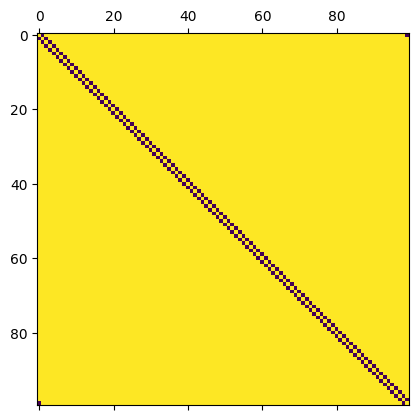

In [35]:
n = 100
hklabels = HMomentumlabels(n)
H = HydrogenHamiltonian(n)
plt.matshow(H)

[-2.0000000000000013, -1.9960534568565431, -1.984229402628956, -1.9645745014573768, -1.9371663222572628, -1.9021130325903073, -1.8595529717765031, -1.8096541049320396, -1.7526133600877278, -1.6886558510040302, -1.6180339887498958, -1.5410264855515785, -1.457937254842823, -1.369094211857378, -1.2748479794973795, -1.175570504584946, -1.0716535899579933, -0.9635073482034306, -0.8515585831301454, -0.7362491053693565, -0.6180339887498949, -0.4973797743297095, -0.37476262917144926, -0.2506664671286084, -0.12558103905862675, 4.462303413760722e-32, 0.12558103905862678, 0.2506664671286085, 0.3747626291714493, 0.49737977432970953, 0.6180339887498949, 0.7362491053693563, 0.8515585831301454, 0.9635073482034305, 1.0716535899579933, 1.1755705045849463, 1.2748479794973795, 1.3690942118573772, 1.457937254842823, 1.5410264855515783, 1.6180339887498927, 1.6886558510040308, 1.7526133600877265, 1.80965410493204, 1.8595529717765027, 1.9021130325903077, 1.937166322257262, 1.9645745014573772, 1.9842294026289

Text(0.5, 1.0, 'Band struture of regular hydrogen')

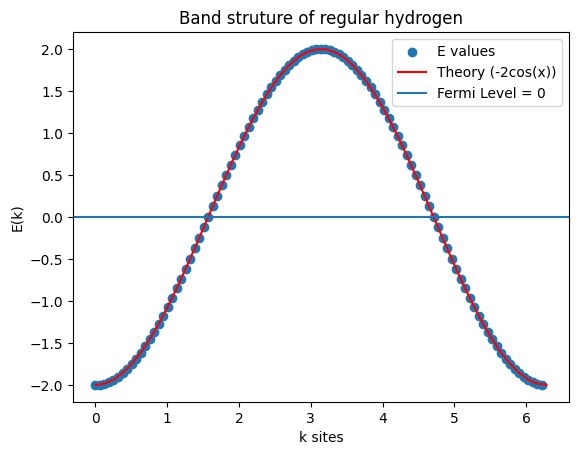

In [36]:
F = HydrogenTransform(n)
Hk = F.H @ H @ F
xs = [HMomentumLabelToK(hklabels[i], n) for i in range(n)]
Es = [Hk[i, i].real for i in range(n)]
print(Es)
plt.scatter(xs, Es, label="E values")
x = np.linspace(0, 2 * np.pi)
plt.plot(x, -2 * np.cos(x), c="red", label="Theory (-2cos(x))")
plt.axhline(np.mean(Es), label="Fermi Level = 0")
plt.legend()
plt.xlabel("k sites")
plt.ylabel("E(k)")
plt.title("Band struture of regular hydrogen")

200


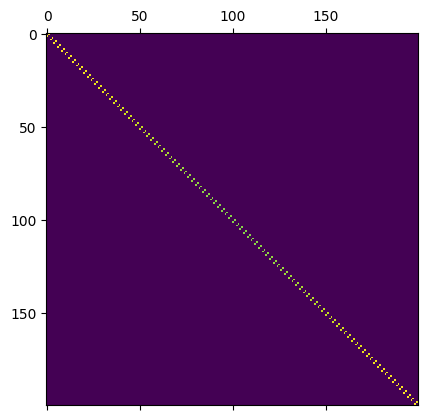

In [29]:
n = 100
hklabels = HMomentumlabels(n, distorted=True)
print(len(hklabels))
H = HydrogenHamiltonian(n, distorted=True)
F = HydrogenTransform(n, distorted=True)
Hk = F.H @ H @ F
plt.matshow(np.abs(Hk))

[-1.1000000000000008, 1.1000000000000008, -1.099820597045561, 1.099820597045561, -1.099282920936597, 1.099282920936597, -1.0983885697446685, 1.0983885697446685, -1.0971402062752633, 1.0971402062752633, -1.0955415570661988, 1.0955415570661988, -1.0935974109230737, 1.0935974109230737, -1.0913136169283346, 1.0913136169283346, -1.0886970818408457, 1.0886970818408457, -1.085755766782016, 1.085755766782016, -1.082498683082335, 1.082498683082335, -1.078935887138415, 1.078935887138415, -1.0750784741051616, 1.0750784741051616, -1.0709385702204108, 1.0709385702204108, -1.0665293235301774, 1.0665293235301774, -1.0618648927516603, 1.0618648927516603, -1.0569604339783962, 1.0569604339783962, -1.0518320848977478, 1.0518320848977478, -1.0464969461556086, 1.0464969461556086, -1.040973059467408, 1.040973059467408, -1.035279382038969, 1.035279382038969, -1.029435756826511, 1.029435756826511, -1.0234628781334207, 1.0234628781334207, -1.0173822520138933, 1.0173822520138933, -1.011216150932066, 1.011216150

Text(0.5, 1.0, 'Band structure of distorted hydrogen')

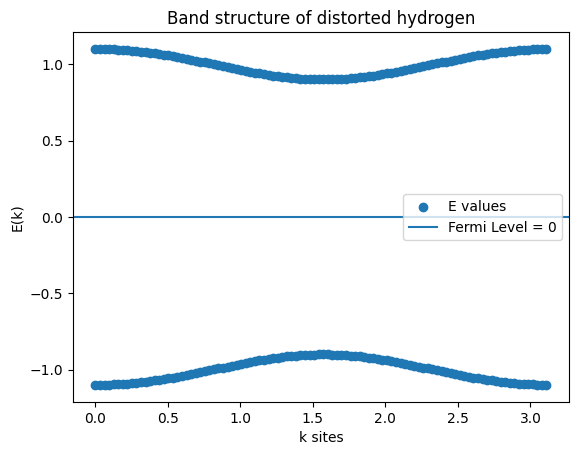

In [33]:

Es = []
for i in range(n):
    bb1, bb2 = 2*i, 2*i + 2
    block = Hk[bb1:bb2, bb1:bb2]
    eigs, vecs = np.linalg.eigh(block)
    for eig in eigs:
        Es.append(eig)
xs = [HMomentumLabelToK(hklabels[i], n, distorted=True) for i in range(2*n)]
# Es = [Hk[i, i].real for i in range(n)]
print(Es)
plt.scatter(xs, Es, label="E values")
x = np.linspace(0, 2 * np.pi)
plt.axhline(np.mean(Es), label="Fermi Level = 0")
plt.legend()
plt.xlabel("k sites")
plt.ylabel("E(k)")
plt.title("Band structure of distorted hydrogen")